# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import sys
import json
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline
# Import API key
sys.path.append('..')
from api_keys import (weather_api_key, g_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(20200201)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

612


['kentau',
 'severo-kurilsk',
 'ribeira grande',
 'shenzhen',
 'barrow',
 'grand river south east',
 'punta arenas',
 'beisfjord',
 'jamestown',
 'guerrero negro',
 'rikitea',
 'riyadh',
 'petropavlovsk-kamchatskiy',
 'mataura',
 'arraial do cabo',
 'hilo',
 'andenes',
 'brunico',
 'ushuaia',
 'georgetown',
 'bethel',
 'airai',
 'nizhneyansk',
 'cape town',
 'taolanaro',
 'akyab',
 'amderma',
 'beyneu',
 'tasiilaq',
 'tuktoyaktuk',
 'belushya guba',
 'bac lieu',
 'lichtenfels',
 'inhambane',
 'attawapiskat',
 'tiksi',
 'dekar',
 'khasan',
 'butaritari',
 'maryanovka',
 'kodiak',
 'faanui',
 'hobart',
 'biak',
 'muros',
 'cidreira',
 'vigrestad',
 'vao',
 'usinsk',
 'bluff',
 'batala',
 'muncar',
 'lorengau',
 'la romana',
 'hermanus',
 'miri',
 'auki',
 'atuona',
 'bambous virieux',
 'padang',
 'nouadhibou',
 'carnarvon',
 'altay',
 'vaini',
 'busselton',
 'baghdad',
 'balaipungut',
 'coquimbo',
 'leningradskiy',
 'kesennuma',
 'nemuro',
 'lazaro cardenas',
 'lompoc',
 'kavieng',
 'naz

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
openweathermap_base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
name_lst, lon_lst, lat_lst, max_temp_lst,  humidity_lst, cloudiness_lst, wind_speed_lst, country_lst, date_lst = [], [], [], [], [], [], [], [], []

print('Beginning Data Retrieval')
print('-----------------------------')
for index, city in enumerate(cities):
    city_url = f'{openweathermap_base_url}{city}&appid={weather_api_key}'
    city_response = requests.get(city_url).json()
    print(f'Processing Record {index} | {city}')
#     print(json.dumps(city_response, indent = 4))
    try:
        lon_lst.append(city_response['coord']['lon'])
        lat_lst.append(city_response['coord']['lat'])
        max_temp_lst.append(city_response['main']['temp_max'])
        humidity_lst.append(city_response['main']['humidity'])
        cloudiness_lst.append(city_response['clouds']['all'])
        wind_speed_lst.append(city_response['wind']['speed'])
        country_lst.append(city_response['sys']['country'])
        date_lst.append(city_response['dt'])
        name_lst.append(city)
    except:
        print('City not found. Skipping...')
    time.sleep(1)
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | kentau
Processing Record 1 | severo-kurilsk
Processing Record 2 | ribeira grande
Processing Record 3 | shenzhen
Processing Record 4 | barrow
Processing Record 5 | grand river south east
City not found. Skipping...
Processing Record 6 | punta arenas
Processing Record 7 | beisfjord
Processing Record 8 | jamestown
Processing Record 9 | guerrero negro
Processing Record 10 | rikitea
Processing Record 11 | riyadh
Processing Record 12 | petropavlovsk-kamchatskiy
Processing Record 13 | mataura
Processing Record 14 | arraial do cabo
Processing Record 15 | hilo
Processing Record 16 | andenes
Processing Record 17 | brunico
Processing Record 18 | ushuaia
Processing Record 19 | georgetown
Processing Record 20 | bethel
Processing Record 21 | airai
Processing Record 22 | nizhneyansk
City not found. Skipping...
Processing Record 23 | cape town
Processing Record 24 | taolanaro
City not found. Skipping...
Processing Record 25 |

Processing Record 235 | mehamn
Processing Record 236 | comodoro rivadavia
Processing Record 237 | maniitsoq
Processing Record 238 | linxia
Processing Record 239 | gidam
Processing Record 240 | puerto lopez
Processing Record 241 | college
Processing Record 242 | awjilah
Processing Record 243 | yanan
City not found. Skipping...
Processing Record 244 | paso de carrasco
Processing Record 245 | zafra
Processing Record 246 | shakawe
Processing Record 247 | broome
Processing Record 248 | saint-philippe
Processing Record 249 | rio grande
Processing Record 250 | vila franca do campo
Processing Record 251 | ust-bolsheretsk
City not found. Skipping...
Processing Record 252 | washougal
Processing Record 253 | rock springs
Processing Record 254 | dicabisagan
Processing Record 255 | salalah
Processing Record 256 | henties bay
Processing Record 257 | coahuayana
Processing Record 258 | orikum
Processing Record 259 | general roca
Processing Record 260 | salinopolis
Processing Record 261 | samalaeulu
Ci

Processing Record 460 | palu
Processing Record 461 | atagay
Processing Record 462 | urumqi
Processing Record 463 | gorom-gorom
Processing Record 464 | puri
Processing Record 465 | morgan city
Processing Record 466 | qui nhon
Processing Record 467 | obuasi
Processing Record 468 | celestun
Processing Record 469 | mirnyy
Processing Record 470 | sinnamary
Processing Record 471 | ijaki
City not found. Skipping...
Processing Record 472 | lufilufi
Processing Record 473 | brainerd
Processing Record 474 | zhanakorgan
Processing Record 475 | santa cruz de la palma
Processing Record 476 | caraballeda
Processing Record 477 | bubaque
Processing Record 478 | san alberto
Processing Record 479 | bay city
Processing Record 480 | upington
Processing Record 481 | wampusirpi
City not found. Skipping...
Processing Record 482 | amga
Processing Record 483 | guaranda
Processing Record 484 | tromso
Processing Record 485 | ballina
Processing Record 486 | tezu
Processing Record 487 | dera ghazi khan
Processing R

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather_df = pd.DataFrame({'City': name_lst, 'Lat': lat_lst, 'Lng': lon_lst, 'Max Temp': max_temp_lst
                               , 'Humidity': humidity_lst, 'Cloudiness': cloudiness_lst, 'Wind Speed': wind_speed_lst
                               , 'Country': country_lst, 'Date': date_lst})
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kentau,43.5206,68.5094,38.32,70,100,3.31,KZ,1612492642
1,severo-kurilsk,50.6789,156.1250,12.99,85,73,10.04,RU,1612492643
2,ribeira grande,38.5167,-28.7000,55.22,69,38,19.64,PT,1612492644
3,shenzhen,22.5455,114.0683,72.00,65,17,5.01,CN,1612492598
4,barrow,71.2906,-156.7887,-27.40,75,75,8.05,US,1612492676


In [9]:
city_weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [10]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,21.460462,16.317480,48.608562,75.070833,55.166667,7.952229,1.612493e+09
std,32.989229,91.101635,31.178129,17.396613,39.766087,5.910364,1.966006e+02
min,-54.800000,-175.200000,-41.800000,19.000000,0.000000,0.180000,1.612492e+09
25%,-6.799850,-67.014150,30.200000,66.000000,9.750000,3.440000,1.612493e+09
50%,26.827900,21.417550,57.200000,78.000000,72.000000,6.620000,1.612493e+09
75%,47.814775,93.037500,73.665000,88.000000,94.250000,11.180000,1.612493e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,35.540000,1.612493e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
bad_humidify = city_weather_df.loc[city_weather_df['Humidity'] > 100, :]
bad_humidify

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,21.460462,16.317480,48.608562,75.070833,55.166667,7.952229,1.612493e+09
std,32.989229,91.101635,31.178129,17.396613,39.766087,5.910364,1.966006e+02
min,-54.800000,-175.200000,-41.800000,19.000000,0.000000,0.180000,1.612492e+09
25%,-6.799850,-67.014150,30.200000,66.000000,9.750000,3.440000,1.612493e+09
50%,26.827900,21.417550,57.200000,78.000000,72.000000,6.620000,1.612493e+09
75%,47.814775,93.037500,73.665000,88.000000,94.250000,11.180000,1.612493e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,35.540000,1.612493e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df
city_weather_df.to_csv('Output/city_weather.csv')

In [15]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kentau,43.5206,68.5094,38.32,70,100,3.31,KZ,1612492642
1,severo-kurilsk,50.6789,156.1250,12.99,85,73,10.04,RU,1612492643
2,ribeira grande,38.5167,-28.7000,55.22,69,38,19.64,PT,1612492644
3,shenzhen,22.5455,114.0683,72.00,65,17,5.01,CN,1612492598
4,barrow,71.2906,-156.7887,-27.40,75,75,8.05,US,1612492676
...,...,...,...,...,...,...,...,...,...
475,paamiut,61.9940,-49.6678,17.65,74,0,5.59,GL,1612493099
476,montepuez,-13.1256,38.9997,68.05,97,10,1.21,MZ,1612493252
477,oriximina,-1.7656,-55.8661,77.23,85,18,4.97,BR,1612493253
478,tyukhtet,56.5389,89.3011,3.79,94,96,6.87,RU,1612493254


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

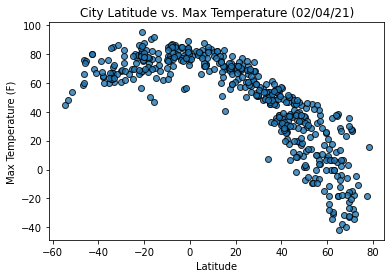

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Max_Temperature.png')

### The code above analyzed the relationship between city latitude and max temperature. It shows that the max temperature near latitude is relatively higher. The higher the absolute value of latitude is,  the lower the max temperature gets.

## Latitude vs. Humidity Plot

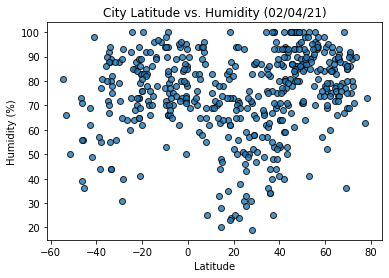

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Humidity.png')

### The code above analyzed the relationship between city latitude and humidity. 

## Latitude vs. Cloudiness Plot

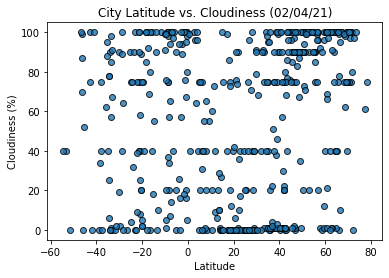

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

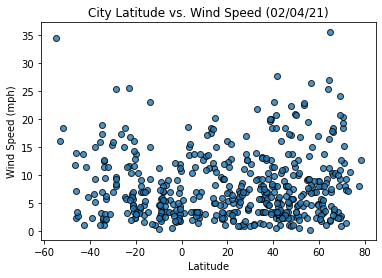

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Wind_Speed.png')

### The code above analyzed the relationship between city latitude and cloudiness. It shows that there are more cities with lower wind speed regardless of the latitude but no obvious correlation between city latitude and cloudiness. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0, :]
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0, :]

The r-squared value is 0.7687443108474851


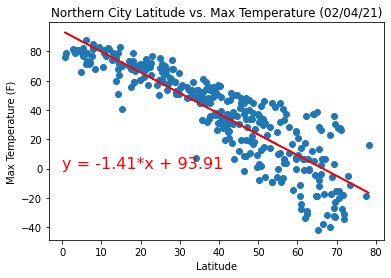

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(northern_df['Lat'], northern_df['Max Temp'])

plt.title(f'Northern City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Max Temp'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (0, 0), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Max_Temperature.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.23150965861906195


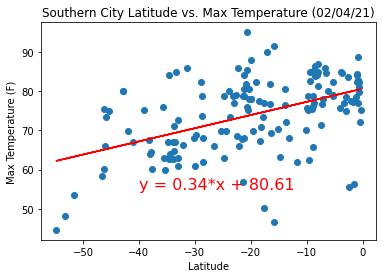

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(southern_df['Lat'], southern_df['Max Temp'])

plt.title(f'Southern City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Max Temp'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-40, 55), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Max_Temperature.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.11234940717066812


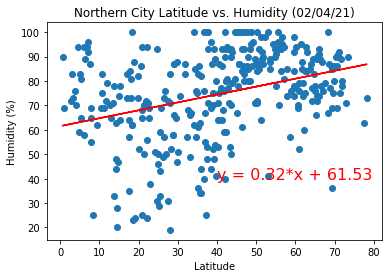

<Figure size 432x288 with 0 Axes>

In [33]:
plt.scatter(northern_df['Lat'], northern_df['Humidity'])

plt.title(f'Northern City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Humidity'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (40, 40), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.1057286732557202


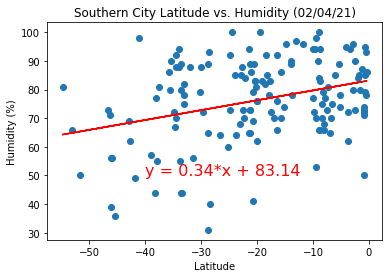

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(southern_df['Lat'], southern_df['Humidity'])

plt.title(f'Southern City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Humidity'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-40, 50), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.16243194757465038


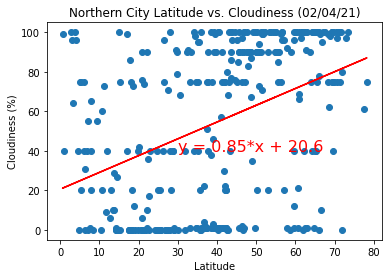

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'])

plt.title(f'Northern City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Cloudiness'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (30, 40), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.025284007567162297


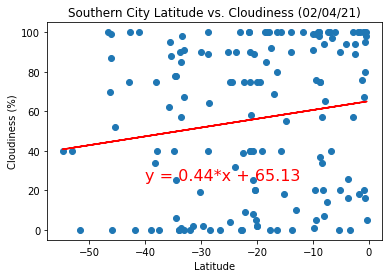

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(southern_df['Lat'], southern_df['Cloudiness'])

plt.title(f'Southern City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Cloudiness'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-40, 25), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.009229955826075853


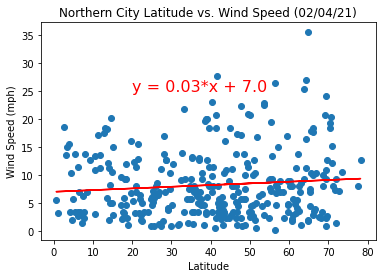

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'])

plt.title(f'Northern City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Wind Speed'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (20, 25), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.11718490369504227


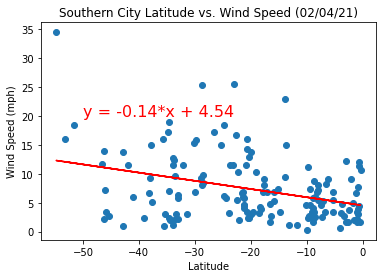

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'])

plt.title(f'Southern City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Wind Speed'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-50, 20), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Wind_Speed.png')